In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filename = '../../data/processed/reshaped.csv'
df = pd.read_csv(filename)
df.head()

,zipcode,start_year,avg_eqi_year_5-10,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,year_1_SFR_MSA,...,year_4_SFR_zip,year_5_EQI_MSA,year_5_EQI_state,year_5_EQI_zip,year_5_RECPI_MSA,year_5_RECPI_state,year_5_RECPI_zip,year_5_SFR_MSA,year_5_SFR_state,year_5_SFR_zip
0,1001,1992,0.001287,0.001549,0.002111,0.002216,1.176876,28.052156,0.048744,760.0,...,23.0,0.001361,0.002326,0.001971,1.203223,38.430626,0.057166,884.0,16520.0,29.0
1,1001,1997,0.001853,0.001233,0.002386,0.000840,1.112023,41.174500,0.035283,902.0,...,39.0,0.001299,0.003029,0.001835,1.177120,55.327602,0.053203,906.0,18265.0,29.0
2,1001,2002,0.000602,0.001494,0.002450,0.001504,1.746593,50.713380,0.054131,1169.0,...,43.0,0.000917,0.001913,0.003813,1.454710,47.060886,0.183047,1586.0,24597.0,48.0
3,1001,2007,0.000898,0.000702,0.001817,0.000611,1.081845,45.171143,0.036063,1541.0,...,55.0,0.000808,0.001884,0.000480,1.144370,45.149307,0.024020,1417.0,23961.0,50.0
4,1002,1992,0.002931,0.001549,0.002111,0.000959,1.176876,28.052156,0.020148,760.0,...,26.0,0.001361,0.002326,0.001732,1.203223,38.430626,0.072728,884.0,16520.0,42.0


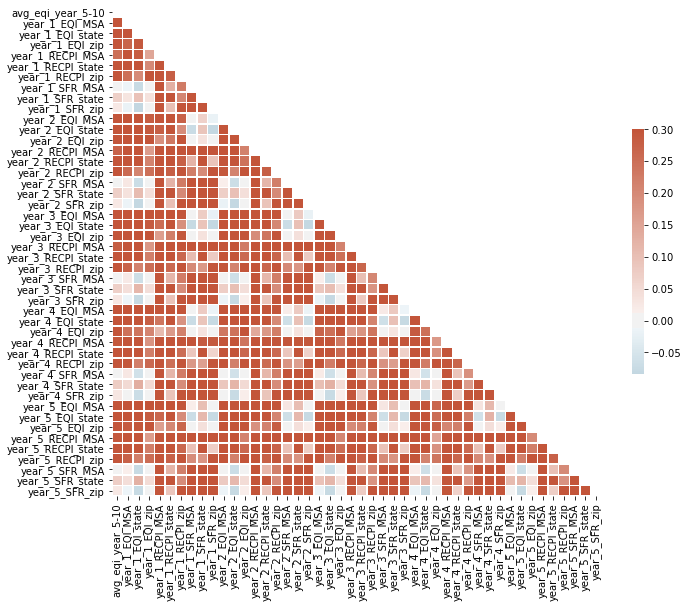

In [3]:
# Compute the correlation matrix
corr = df.drop(['zipcode','start_year'], axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [4]:
corr['avg_eqi_year_5-10'].drop(['avg_eqi_year_5-10']).sort_values(ascending=True)

year_1_SFR_MSA       -0.000040
year_5_SFR_MSA        0.001455
year_2_SFR_MSA        0.003512
year_3_SFR_MSA        0.004141
year_4_SFR_MSA        0.005994
year_1_SFR_zip        0.024836
year_2_SFR_zip        0.025444
year_5_SFR_zip        0.025944
year_3_SFR_zip        0.026372
year_4_SFR_zip        0.029121
year_1_SFR_state      0.068418
year_3_SFR_state      0.070511
year_2_SFR_state      0.071159
year_5_SFR_state      0.074607
year_4_SFR_state      0.076055
year_1_RECPI_MSA      0.248788
year_2_RECPI_MSA      0.273015
year_3_RECPI_MSA      0.284083
year_5_RECPI_MSA      0.290501
year_4_RECPI_MSA      0.292916
year_1_RECPI_state    0.305616
year_2_RECPI_state    0.317950
year_3_RECPI_state    0.322928
year_4_RECPI_state    0.322938
year_4_EQI_zip        0.327204
year_5_RECPI_state    0.333629
year_1_EQI_zip        0.359081
year_1_EQI_MSA        0.382892
year_1_RECPI_zip      0.396477
year_4_EQI_state      0.403733
year_2_RECPI_zip      0.407018
year_3_RECPI_zip      0.414309
year_3_E

In [5]:
df = df[df.columns.drop(list(df.filter(regex='SFR')))]

In [6]:
df['eqi_zip_abs_change'] = df.apply(lambda row: row.year_5_EQI_zip - row.year_1_EQI_zip, axis=1)
df['recpi_zip_abs_change'] = df.apply(lambda row: row.year_5_RECPI_zip - row.year_1_RECPI_zip, axis=1)
df['eqi_zip_pct_change'] = df.apply(lambda row: row.year_5_EQI_zip / row.year_1_EQI_zip, axis=1)
df['recpi_zip_pct_change'] = df.apply(lambda row: row.year_5_RECPI_zip / row.year_1_RECPI_zip, axis=1)

In [7]:
df['eqi_zip_change_1'] = df.apply(lambda row: row.year_2_EQI_zip / row.year_1_EQI_zip, axis=1)
df['eqi_zip_change_2'] = df.apply(lambda row: row.year_3_EQI_zip / row.year_2_EQI_zip, axis=1)
df['eqi_zip_change_3'] = df.apply(lambda row: row.year_4_EQI_zip / row.year_3_EQI_zip, axis=1)
df['eqi_zip_change_4'] = df.apply(lambda row: row.year_5_EQI_zip / row.year_4_EQI_zip, axis=1)

In [8]:
df['eqi_msa_change_1'] = df.apply(lambda row: row.year_2_EQI_MSA / row.year_1_EQI_MSA, axis=1)
df['eqi_msa_change_2'] = df.apply(lambda row: row.year_3_EQI_MSA / row.year_2_EQI_MSA, axis=1)
df['eqi_msa_change_3'] = df.apply(lambda row: row.year_4_EQI_MSA / row.year_3_EQI_MSA, axis=1)
df['eqi_msa_change_4'] = df.apply(lambda row: row.year_5_EQI_MSA / row.year_4_EQI_MSA, axis=1)

In [9]:
df['eqi_state_change_1'] = df.apply(lambda row: row.year_2_EQI_state / row.year_1_EQI_state, axis=1)
df['eqi_state_change_2'] = df.apply(lambda row: row.year_3_EQI_state / row.year_2_EQI_state, axis=1)
df['eqi_state_change_3'] = df.apply(lambda row: row.year_4_EQI_state / row.year_3_EQI_state, axis=1)
df['eqi_state_change_4'] = df.apply(lambda row: row.year_5_EQI_state / row.year_4_EQI_state, axis=1)

In [10]:
df['recpi_zip_change_1'] = df.apply(lambda row: row.year_2_RECPI_zip / row.year_1_RECPI_zip, axis=1)
df['recpi_zip_change_2'] = df.apply(lambda row: row.year_3_RECPI_zip / row.year_2_RECPI_zip, axis=1)
df['recpi_zip_change_3'] = df.apply(lambda row: row.year_4_RECPI_zip / row.year_3_RECPI_zip, axis=1)
df['recpi_zip_change_4'] = df.apply(lambda row: row.year_5_RECPI_zip / row.year_4_RECPI_zip, axis=1)

In [11]:
df['recpi_msa_change_1'] = df.apply(lambda row: row.year_2_RECPI_MSA / row.year_1_RECPI_MSA, axis=1)
df['recpi_msa_change_2'] = df.apply(lambda row: row.year_3_RECPI_MSA / row.year_2_RECPI_MSA, axis=1)
df['recpi_msa_change_3'] = df.apply(lambda row: row.year_4_RECPI_MSA / row.year_3_RECPI_MSA, axis=1)
df['recpi_msa_change_4'] = df.apply(lambda row: row.year_5_RECPI_MSA / row.year_4_RECPI_MSA, axis=1)

In [12]:
df['recpi_state_change_1'] = df.apply(lambda row: row.year_2_RECPI_state / row.year_1_RECPI_state, axis=1)
df['recpi_state_change_2'] = df.apply(lambda row: row.year_3_RECPI_state / row.year_2_RECPI_state, axis=1)
df['recpi_state_change_3'] = df.apply(lambda row: row.year_4_RECPI_state / row.year_3_RECPI_state, axis=1)
df['recpi_state_change_4'] = df.apply(lambda row: row.year_5_RECPI_state / row.year_4_RECPI_state, axis=1)

In [13]:
df['avg_eqi_year_1-5'] = df.apply(lambda row: ((row.year_1_EQI_zip + row.year_2_EQI_zip + row.year_3_EQI_zip + row.year_4_EQI_zip + row.year_5_EQI_zip)/5), axis=1)

In [14]:
# Compute new correlation matrix
corr = df.drop(['zipcode','start_year'], axis=1).corr()

In [16]:
corr['avg_eqi_year_5-10'].drop(['avg_eqi_year_5-10']).sort_values(ascending=True)

recpi_msa_change_4     -0.010470
recpi_msa_change_3     -0.008826
eqi_msa_change_1       -0.003398
recpi_state_change_1   -0.002160
recpi_state_change_2   -0.001904
recpi_msa_change_2     -0.000231
recpi_state_change_4    0.002092
recpi_state_change_3    0.002238
recpi_msa_change_1      0.003005
eqi_msa_change_2        0.004879
recpi_zip_change_2      0.011666
eqi_msa_change_4        0.012677
recpi_zip_change_1      0.019596
eqi_zip_change_2        0.020568
eqi_msa_change_3        0.020579
eqi_zip_change_1        0.024222
eqi_state_change_1      0.027045
eqi_state_change_2      0.033499
eqi_zip_change_3        0.034866
recpi_zip_change_3      0.038482
eqi_state_change_4      0.041826
recpi_zip_pct_change    0.042948
eqi_state_change_3      0.049884
recpi_zip_change_4      0.054245
eqi_zip_change_4        0.067133
eqi_zip_pct_change      0.071291
eqi_zip_abs_change      0.097326
recpi_zip_abs_change    0.217960
year_1_RECPI_MSA        0.248788
year_2_RECPI_MSA        0.273015
year_3_REC

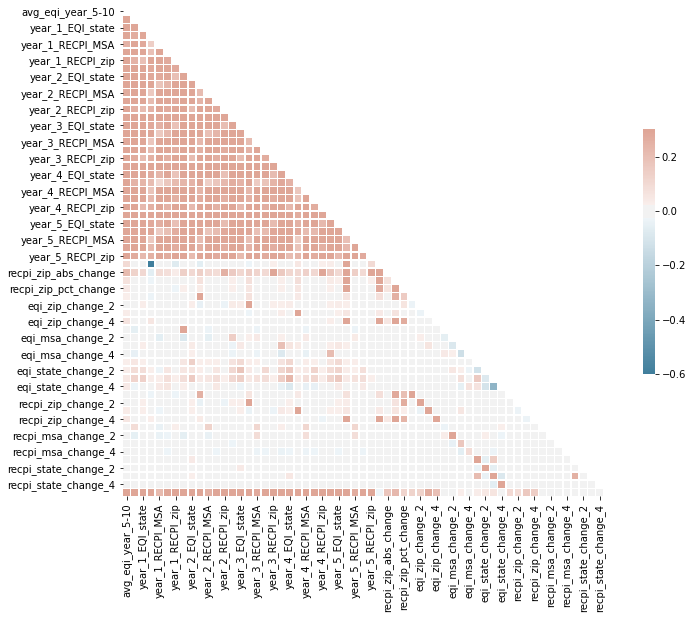

In [17]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
path = '../../data/processed/feature-eng.csv'
df.to_csv(path, index=False)